In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')

LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')


DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type']
 


In [6]:
# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [7]:
df.columns

Index(['booking_date', 'bailed_out', 'pri_dx_value', 'refferal_source',
       'mh_treatment', 'within_one', 'within_two', 'sexFEMALE', 'sexMALE',
       'sexmissing',
       ...
       'retirement_income_bin3', 'retirement_income_bin4',
       'rent_over_income_bin1', 'rent_over_income_bin2',
       'rent_over_income_bin3', 'rent_over_income_bin4', 'bail_amt_bin1',
       'bail_amt_bin2', 'bail_amt_bin3', 'bail_amt_bin4'],
      dtype='object', length=116)

In [8]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)

# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

In [9]:
final_options.person_societal_var

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [10]:
#Running on Unbiased set of personal data and census data
x_train = x_train[final_options.person_societal_var]
x_test = x_test[final_options.person_societal_var]

In [11]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [12]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
26,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.5629,0.2365,0.0427,"(0.2582, 0.0646, 0.1033)","(0.294, 0.147, 0.196)","(0.2885, 0.2885, 0.2885)"
23,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 1000}",0.5774,0.2481,12.8556,"(0.3187, 0.0797, 0.1275)","(0.2637, 0.1319, 0.1758)","(0.2734, 0.2734, 0.2734)"
112,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.5941,0.2573,0.3324,"(0.3132, 0.0783, 0.1253)","(0.3132, 0.1566, 0.2088)","(0.3063, 0.3063, 0.3063)"
49,Logit,"{'C': 10, 'penalty': 'l2'}",0.5850,0.2517,0.2715,"(0.3077, 0.0769, 0.1231)","(0.2692, 0.1346, 0.1795)","(0.2802, 0.2802, 0.2802)"
114,NB,{},0.5522,0.2328,0.0364,"(0.3352, 0.0838, 0.1341)","(0.2665, 0.1332, 0.1777)","(0.2266, 0.2266, 0.2266)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.5977,0.2661,1.2058,"(0.3626, 0.0907, 0.1451)","(0.3297, 0.1648, 0.2198)","(0.3049, 0.3049, 0.3049)"
58,Tree,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.5949,0.2463,0.0264,"(0.2582, 0.0646, 0.1033)","(0.2857, 0.1429, 0.1905)","(0.2898, 0.2898, 0.2898)"


In [23]:
#best

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [1000]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [10],
  'n_jobs': [-1]},
 'Logit': {'C': [10], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

In [13]:
viz_df = final_load_dfs.load_from_file('FINAL.csv')
train, test = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)
y = ['within_one', 'within_two']
a, viz_x, b, c = final_temporal.split_data(train, test, y)

LoadedFINAL.csv


In [15]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag


/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code/final_classifier_final.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  viz_x[name] = y_pred_probs


Boost
ET
Logit
NB
RF
Tree


In [14]:
#df_sorting.columns

In [16]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [17]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [18]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
948,407,0.0,22.0,OVERLAND PARK P.D.,CITY,2500.0,ORCD,1,15011815,15CR02484,...,missing,KS,66062,0.391667,0.500099,0.950000,0.592331,1.000000,0.929637,1.000000
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.341667,0.499581,0.923077,0.152676,1.000000,0.864630,0.923077
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.341667,0.499581,0.923077,0.152676,1.000000,0.864630,0.923077
2595,475,1282.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000811,14CR02514,...,MALE,KS,66061,0.375000,0.499759,0.962500,0.305045,1.000000,0.787063,1.000000
3837,475,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000762,16CR00054,...,MALE,KS,66061,0.375000,0.499759,0.962500,0.305045,1.000000,0.787063,1.000000
3088,475,217.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16001674,16CR00374,...,MALE,KS,66061,0.325000,0.499791,0.962500,0.332960,1.000000,0.774761,1.000000
4569,475,0.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16000905,16CR00181,...,MALE,KS,66061,0.325000,0.499791,0.962500,0.332960,1.000000,0.774761,1.000000
2191,475,1846.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16004657,16DV00472,...,MALE,KS,66061,0.325000,0.499791,0.962500,0.332960,1.000000,0.774761,1.000000
3344,475,0.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16000090,09CR02002,...,MALE,KS,66061,0.325000,0.499791,0.962500,0.332960,1.000000,0.774761,1.000000
3338,475,0.0,NaN,OLATHE P.D.,CITY,NaN,SUR,0,16002959,16CR00680,...,MALE,KS,66061,0.325000,0.499791,0.962500,0.332960,1.000000,0.774761,1.000000


In [19]:
def plotting_curves (dataframe, feature):
    '''
    Given a dataframe, a column name, 
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        feature: column name (string)
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    title = feature + ' Graph'
    ax = sns.distplot(dataframe[feature])
    ax.set_title(title)


In [20]:
def value_counter (dataframe, feature):
    '''
    Given a dataframe, and feature,
        gives the number of occurrences of each value in that feature column
        
    Input:
        dataframe
        feature: string
    
    Output: dataframe
    '''
    return dataframe[feature].value_counts()

In [21]:
def plot_df(df, columns, save=False):

    for col in columns:
        count_column = df[col].value_counts()
        plt.figure(figsize=(len(count_column), 5))
        column_figure = sns.barplot(count_column.index, count_column.values, alpha=0.8)
        plt.title('{} values'.format(col))
        plt.ylabel('Number of Counts', fontsize=12)
        plt.xlabel(col, fontsize=12) 

        if save: 
            column_figure.figure.savefig('{}.png'.format(col))
            print('figure is saved as a file ~.png')
        else:
            plt.show()
    return None

In [22]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out',
        'case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry',
         'rent_over_income']

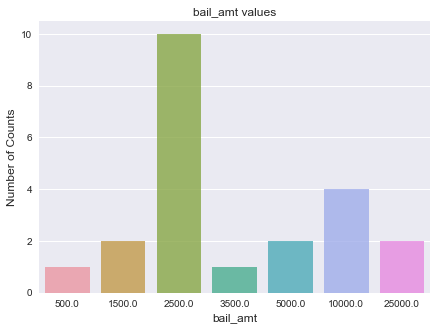

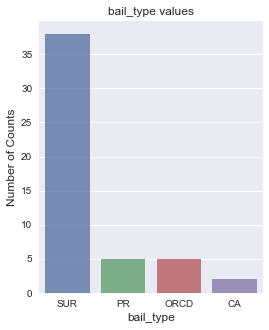

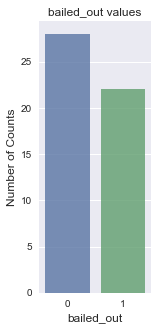

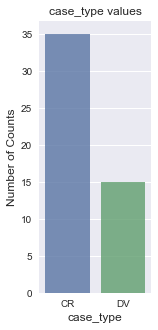

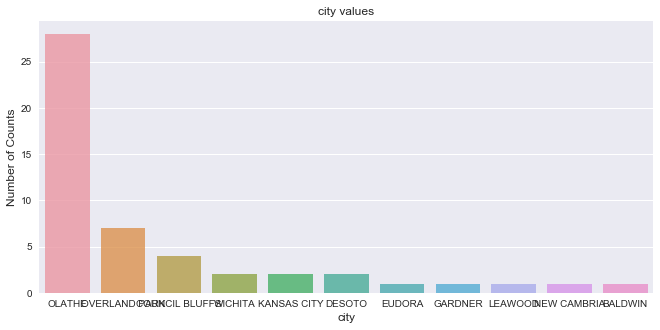

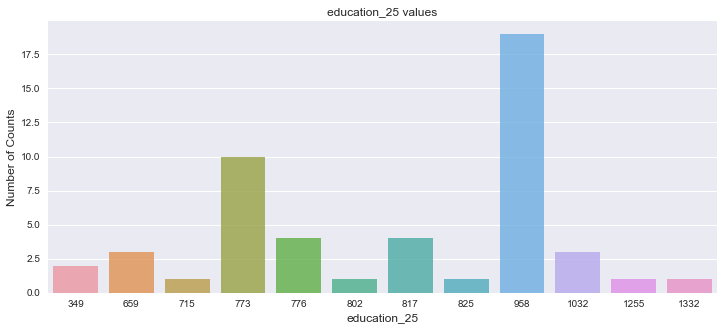

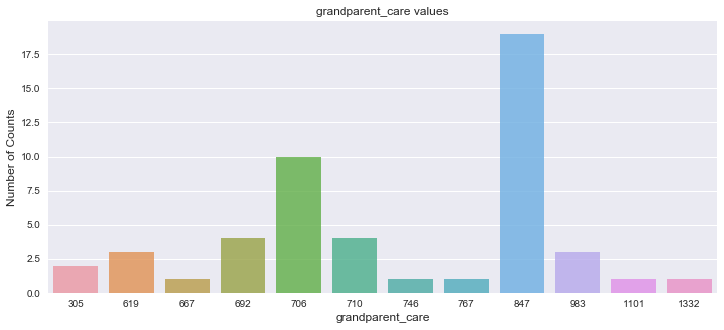

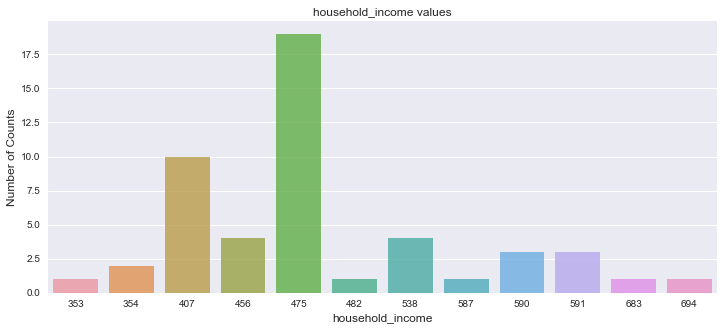

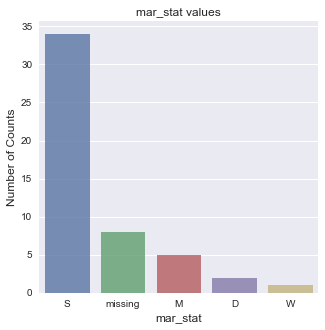

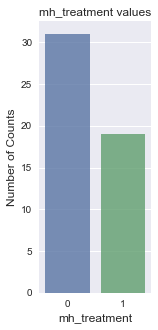

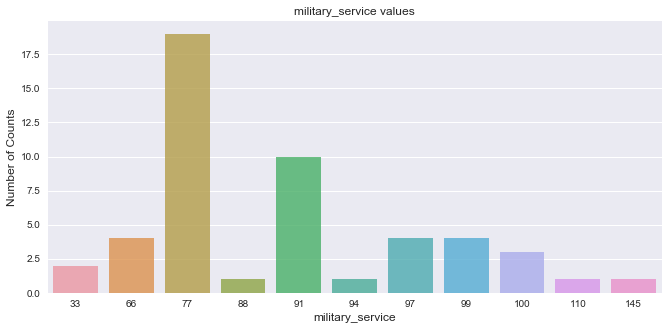

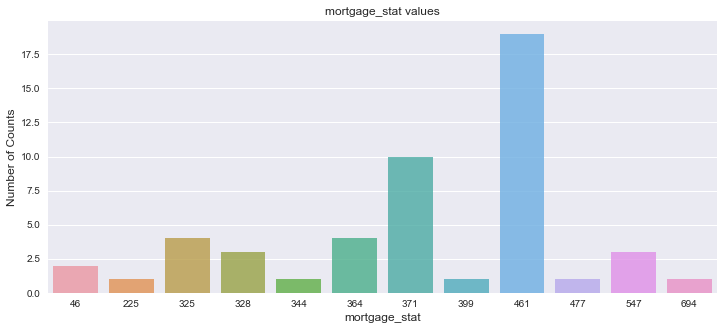

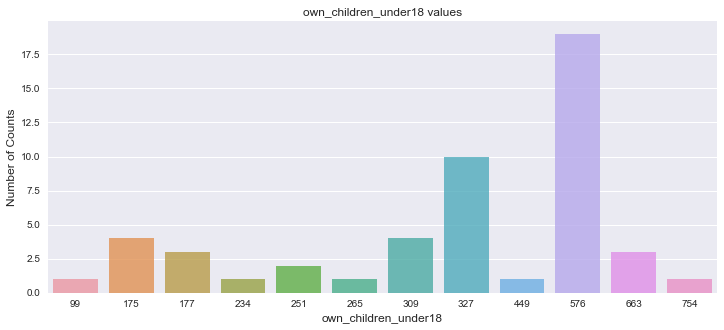

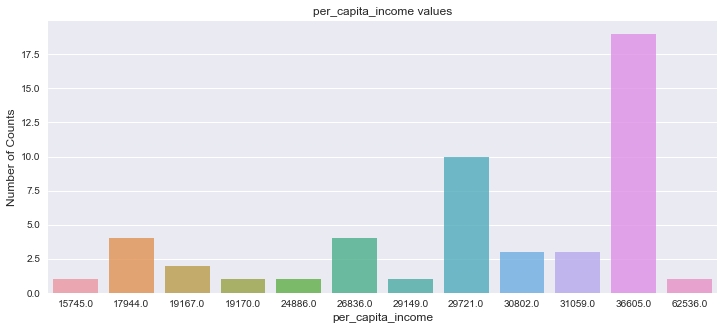

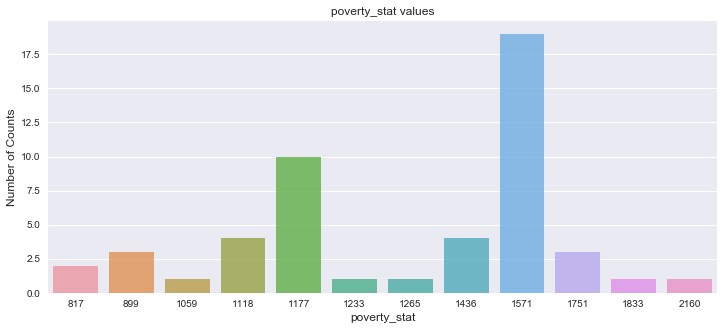

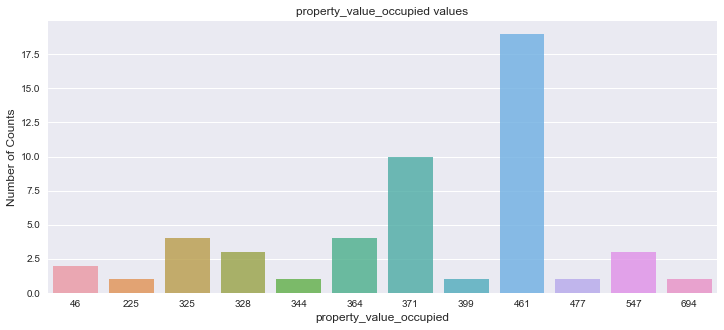

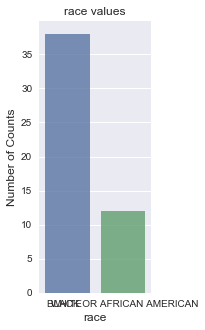

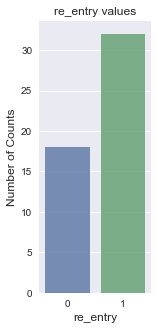

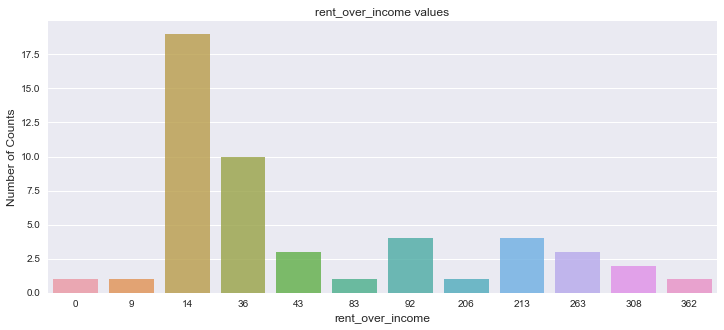

In [23]:
plot_df(RF_df[:50], features_to_see, save=False)

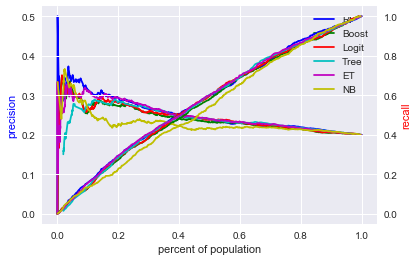

In [24]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. age_bin1 (0.058010)
2. sexMALE (0.052704)
3. sexFEMALE (0.052258)
4. mar_statM (0.051561)
5. age_bin4 (0.048462)
6. age_bin3 (0.047083)
7. raceWHITE (0.046689)
8. mar_statS (0.046046)
9. age_bin2 (0.043742)
10. raceBLACK OR AFRICAN AMERICAN (0.042834)
11. mar_statmissing (0.034186)
12. mar_statD (0.031431)
13. per_capita_income_bin1 (0.019439)
14. school_enrollment_16-19_bin3 (0.017966)
15. school_enrollment_16-19_bin4 (0.016971)
16. rent_over_income_bin3 (0.016948)
17. per_capita_income_bin2 (0.016897)
18. military_service_bin1 (0.016422)
19. rent_over_income_bin2 (0.015872)
20. school_enrollment_16-19_bin2 (0.014978)


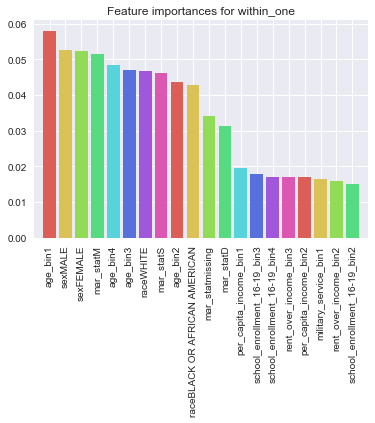

In [25]:
final_plot.feature_importance(x_train, y_train['within_one'], best,"ET",20)

In [12]:
########Running everything on second y within two year of re-entry

In [26]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [27]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
27,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.5341,0.2794,0.1169,"(0.3846, 0.0745, 0.1249)","(0.3049, 0.1182, 0.1704)","(0.2981, 0.2311, 0.2603)"
23,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 1000}",0.5768,0.3137,13.4311,"(0.3846, 0.0745, 0.1249)","(0.3681, 0.1427, 0.2057)","(0.3448, 0.2673, 0.3011)"
112,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.6027,0.3278,0.3298,"(0.3846, 0.0745, 0.1249)","(0.3846, 0.1491, 0.2149)","(0.3599, 0.279, 0.3143)"
49,Logit,"{'C': 10, 'penalty': 'l2'}",0.5831,0.3190,0.3148,"(0.4066, 0.0788, 0.132)","(0.3681, 0.1427, 0.2057)","(0.3558, 0.2758, 0.3107)"
114,NB,{},0.5509,0.2986,0.0344,"(0.4121, 0.0799, 0.1338)","(0.3407, 0.1321, 0.1903)","(0.3063, 0.2375, 0.2675)"
10,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.6017,0.3332,0.1598,"(0.4121, 0.0799, 0.1338)","(0.3819, 0.148, 0.2134)","(0.3654, 0.2833, 0.3191)"
60,Tree,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.6021,0.3213,0.0247,"(0.3242, 0.0628, 0.1053)","(0.3901, 0.1512, 0.218)","(0.3695, 0.2865, 0.3227)"


In [28]:
best2

{'Bag': {'max_features': [5], 'max_samples': [5], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [1000]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [10],
  'n_jobs': [-1]},
 'Logit': {'C': [10], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [10]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [20],
  'max_features': ['log2'],
  'min_samples_split': [2]}}

In [29]:
viz_x.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [30]:
viz_df = final_load_dfs.load_from_file('FINAL.csv')
train, test = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)
y = ['within_one', 'within_two']
a, viz_x, b, c = final_temporal.split_data(train, test, y)

LoadedFINAL.csv


In [32]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag


/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code/final_classifier_final.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  viz_x[name] = y_pred_probs


Boost
ET
Logit
NB
RF
Tree


In [33]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [34]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
948,407,0.0,22.0,OVERLAND PARK P.D.,CITY,2500.0,ORCD,1,15011815,15CR02484,...,missing,KS,66062,0.301333,0.500338,1.000000,0.795233,1.000000,1.000000,1.000000
11787,590,1157.0,20.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,1500.0,PR,1,16003740,16DV00360,...,FEMALE,KS,66018,0.271333,0.499949,0.840000,0.454402,1.000000,0.896705,1.000000
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.404667,0.499664,1.000000,0.200558,1.000000,0.872908,1.000000
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.404667,0.499664,1.000000,0.200558,1.000000,0.872908,1.000000
8467,591,63.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.298000,0.499873,0.846154,0.374053,1.000000,0.854972,0.846154
8912,591,0.0,34.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,10000.0,SUR,1,15009332,15CR01845,...,FEMALE,KS,66204,0.298000,0.499873,0.846154,0.374053,1.000000,0.854972,0.846154
8468,591,-127.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.298000,0.499873,0.846154,0.374053,1.000000,0.854972,0.846154
3837,475,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000762,16CR00054,...,MALE,KS,66061,0.368000,0.499877,1.000000,0.407723,1.000000,0.828503,1.000000
2595,475,1282.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000811,14CR02514,...,MALE,KS,66061,0.368000,0.499877,1.000000,0.407723,1.000000,0.828503,1.000000
130,407,151.0,22.0,OLATHE P.D.,CITY,3500.0,SUR,1,15010016,15DV01105,...,FEMALE,KS,66062,0.301333,0.499954,0.769231,0.456624,1.000000,0.776237,0.769231


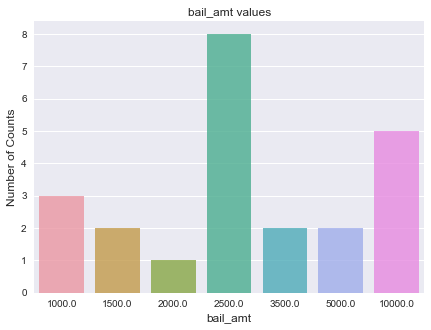

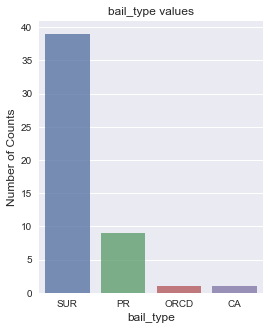

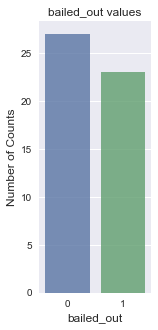

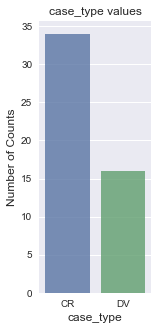

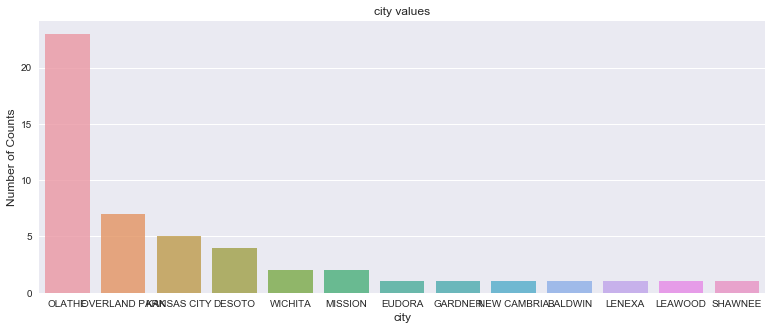

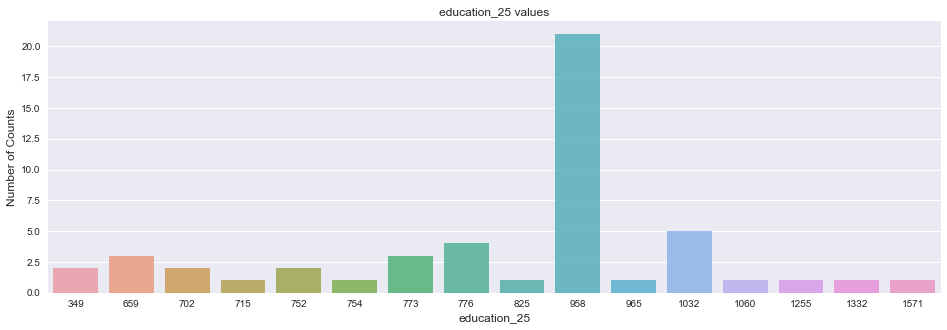

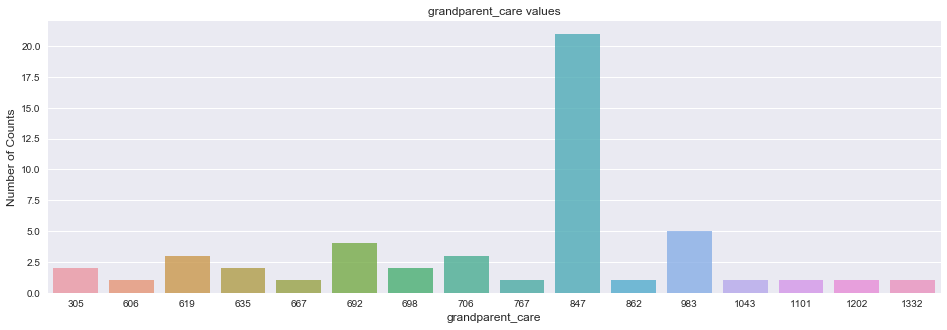

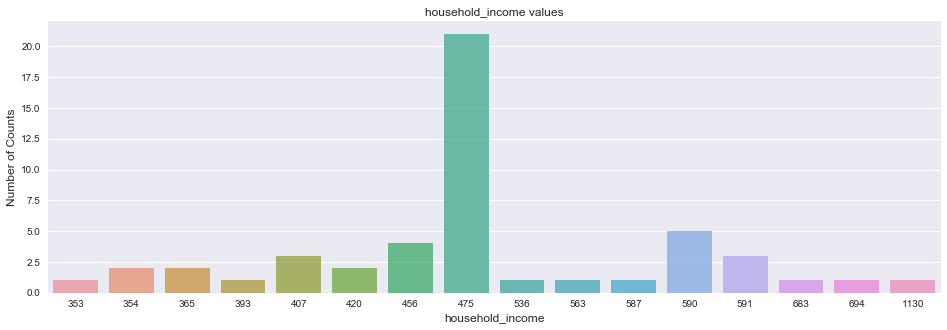

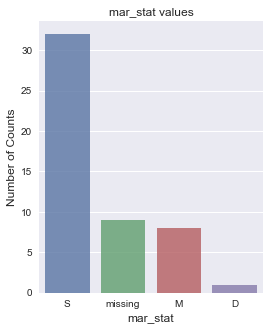

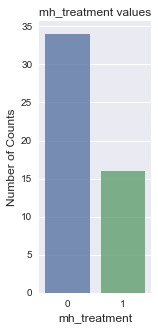

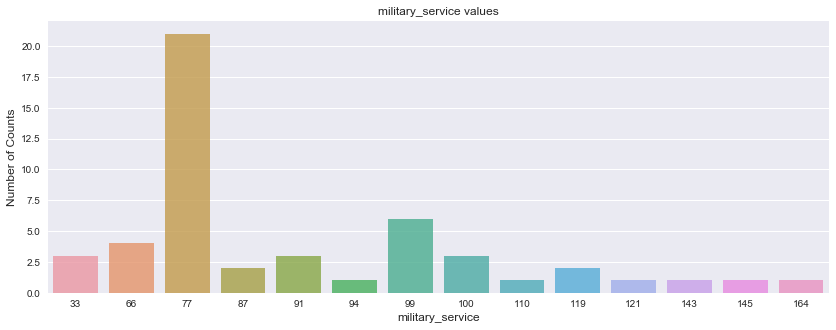

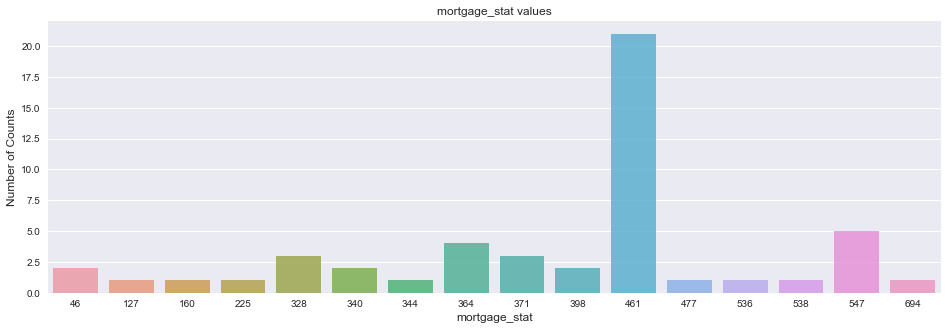

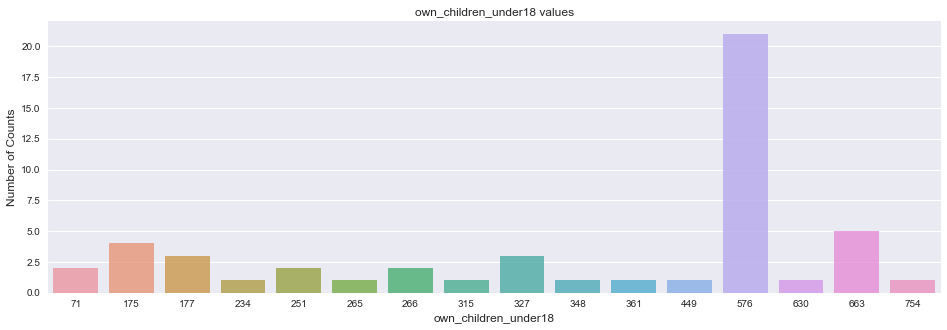

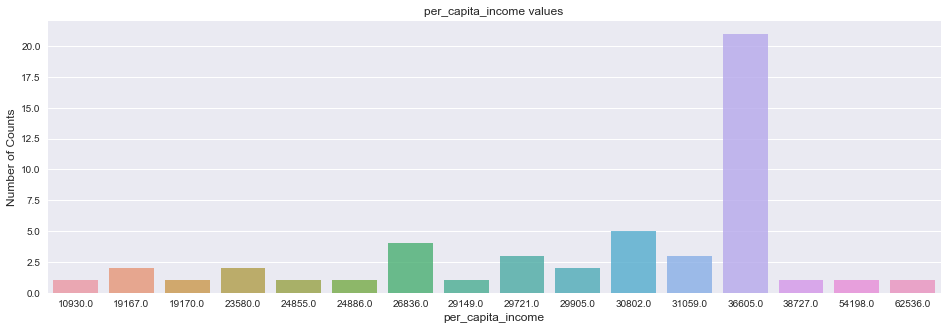

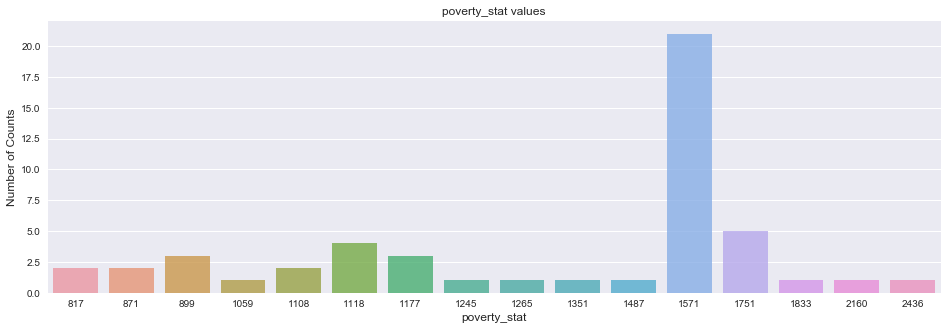

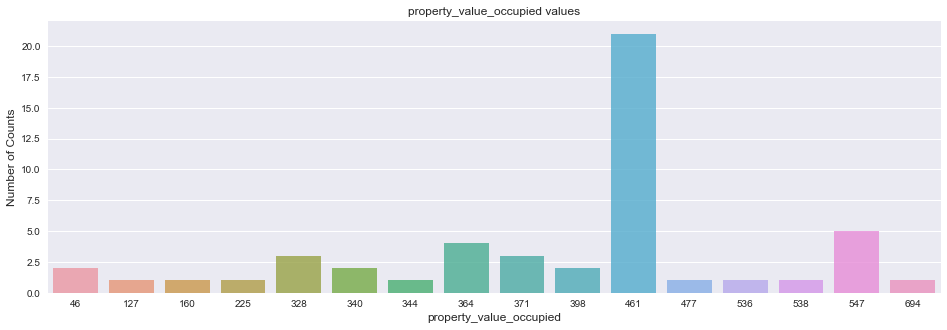

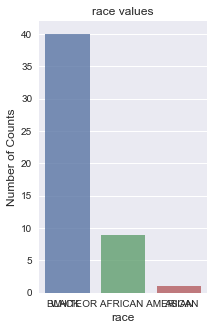

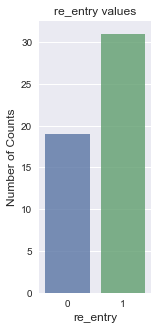

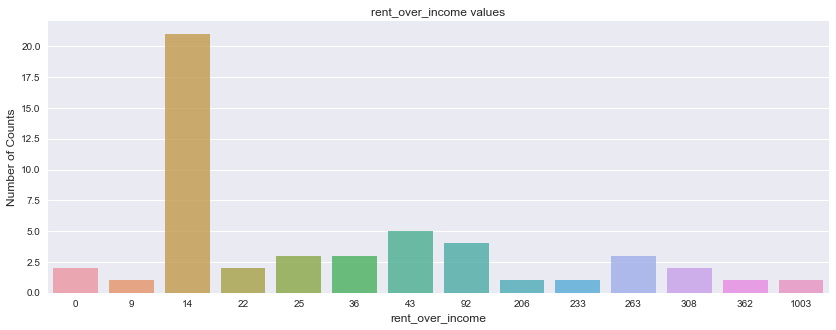

In [35]:
plot_df(RF_df2[:50], features_to_see, save=False)

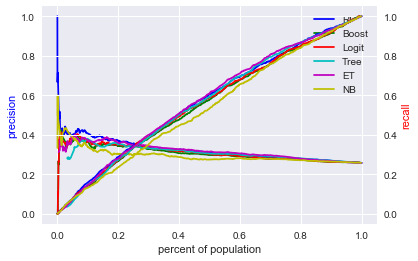

In [36]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. mar_statM (0.055478)
2. mar_statS (0.054659)
3. age_bin1 (0.051807)
4. sexMALE (0.051090)
5. sexFEMALE (0.048327)
6. age_bin4 (0.047546)
7. age_bin3 (0.044967)
8. raceBLACK OR AFRICAN AMERICAN (0.039415)
9. mar_statmissing (0.039021)
10. raceWHITE (0.038271)
11. age_bin2 (0.036144)
12. mar_statD (0.033681)
13. per_capita_income_bin1 (0.021849)
14. school_enrollment_16-19_bin3 (0.017838)
15. per_capita_income_bin2 (0.017494)
16. rent_over_income_bin3 (0.016221)
17. rent_over_income_bin2 (0.016023)
18. military_service_bin1 (0.015850)
19. military_service_bin3 (0.015575)
20. school_enrollment_16-19_bin4 (0.015352)


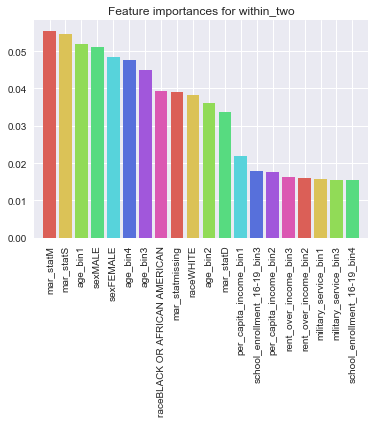

In [37]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)